In [83]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [84]:
import pathlib
data_dir = pathlib.Path('./PetImages/')
# data_dir = pathlib.Path('./PetImages_small/')
# data_dir = pathlib.Path('./PetImages_smallest/')

In [85]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

24998


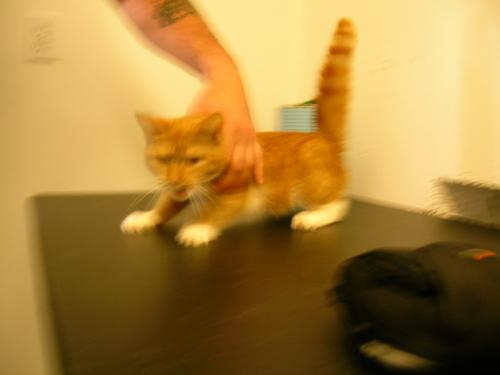

In [86]:
cats = list(data_dir.glob('Cat/*'))
PIL.Image.open(str(cats[0]))

In [87]:
batch_size = 32
img_height = 180
img_width = 180

In [88]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.


In [89]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

24998


In [90]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [91]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


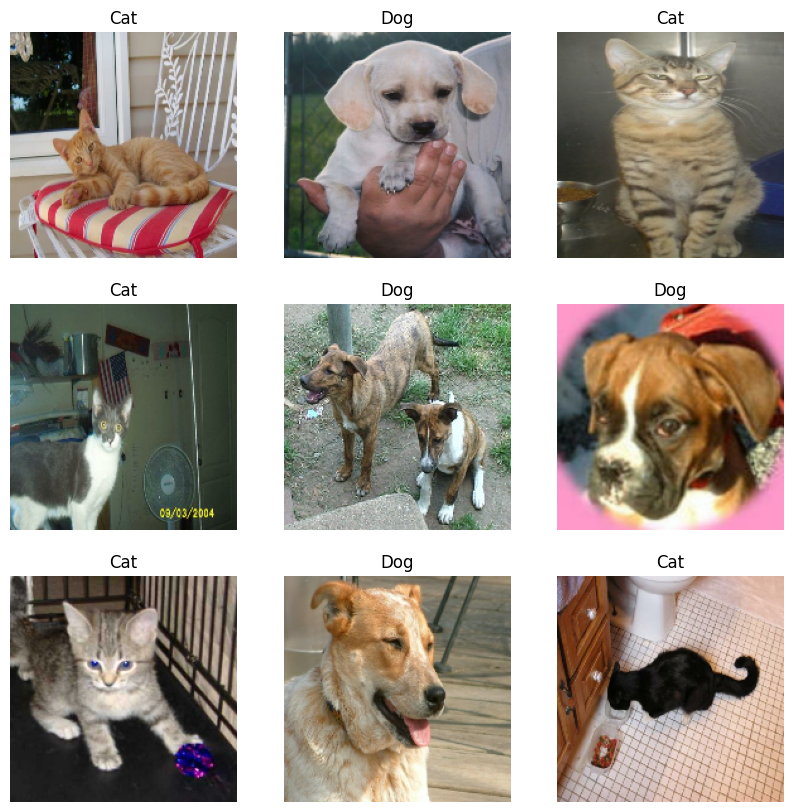

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [93]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [94]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [95]:
normalization_layer = layers.Rescaling(1./255)

In [96]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [106]:
epochs=3
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)




train_generator = train_datagen.flow_from_directory(
        directory=data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        directory=data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n / batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.n/batch_size)

# gen = keras.preprocessing.image.ImageDataGenerator()
# batches = gen.flow(train_ds, train_ds, batch_size=batch_size)
# history = model.fit_generator(
#   generator=batches,
#   steps_per_epoch=batches.n/batches.batch_size,
#   verbose=1,
#   epochs=epochs
# )

Found 24998 images belonging to 2 classes.
Found 24998 images belonging to 2 classes.


AttributeError: 'PrefetchDataset' object has no attribute 'n'

In [101]:
def make_prediction(cat_or_dog, img_num):
  img = tf.keras.utils.load_img(
      f'PetImages/{cat_or_dog}/{img_num}.jpg', target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

In [102]:
make_prediction('Dog', 7194)
make_prediction('Dog', 7199)
make_prediction('Dog', 7204)


make_prediction('Cat', 9033)
make_prediction('Cat', 9031)
make_prediction('Cat', 9038)

1/1 [==============================] - 0s 55ms/step
This image most likely belongs to Dog with a 66.20 percent confidence.
1/1 [==============================] - 0s 18ms/step
This image most likely belongs to Dog with a 76.24 percent confidence.
1/1 [==============================] - 0s 18ms/step
This image most likely belongs to Dog with a 71.07 percent confidence.
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to Dog with a 58.93 percent confidence.
1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Dog with a 69.15 percent confidence.
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to Dog with a 71.56 percent confidence.
